In [1]:
import numpy as np
import cv2

In [11]:
# cap = cv2.VideoCapture('黑豹.mp4')
#查找青色对应HSV值可以用下面的方法
green = np.uint8([[[0,255,0]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)
while(1):
#     _,frame = cap.read()
    frame = cv2.imread('tupianchuli1.png',1)
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV) # 转为 色彩 饱和度 亮度
    lower_blue = np.array([110,50,50]) # define range of blue color
    upper_blue = np.array([130,255,255])
    mask = cv2.inRange(hsv,lower_blue,upper_blue) # threshold the hsv image to get only blue colors
    res = cv2.bitwise_and(frame,frame,mask = mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(40000) & 0xFF
    if k == 27:  
        break
cv2.destroyAllWindows()

[[[ 60 255 255]]]


In [13]:
# 图片几何变换 旋转，移动，仿射变换
# 1：扩展缩放  缩放推荐：cv2.INTER_AREA   扩展推荐：cv2.INTER_CUBIC(慢)和cv2.INTER_LINEAR
img = cv2.imread('b.jpg')
res = cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA) # None对应缩放因子，因后边写了缩放银子故None
height,width = img.shape[:2]
res2 = cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_LINEAR)
while(1):
    cv2.imshow('res',res)
    cv2.imshow('res2',res2)
    cv2.imshow('img',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [15]:
# 2：平移 [ 1 0 tx ]
#     M = [ 0 1 ty ]  此矩阵沿(x,y)方向移动，移动距离(tx,ty)
img = cv2.imread('b.jpg')
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,100]])
dest = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('dest',dest)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
# 3：旋转 
"""      [ cosθ -sinθ]
旋转矩阵 [ sinθ cosθ ]  """
img = cv2.imread('kenan.jpg')
rows,cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,cols/2),90,1) # 旋转中心  角度  缩放因子
dest = cv2.warpAffine(img,M,dsize = (rows,cols)) # 第三个参数为输出图像的尺寸中心
print(dest.shape[:2])
while(1):
    cv2.imshow('dest',dest)
    cv2.imshow('img',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

(500, 300)


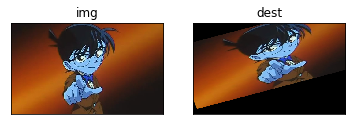

In [36]:
# 4:仿射变换
import matplotlib.pyplot as plt
img = cv2.imread('kenan.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[50,200]])
M =cv2.getAffineTransform(pts1,pts2)
dest = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.xticks([]),plt.yticks([]),plt.title('img')
plt.subplot(122),plt.imshow(dest),plt.xticks([]),plt.yticks([]),plt.title('dest')
plt.show()